In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [63]:
import pandas as pd

In [64]:
pd.__version__

'1.0.1'

# 데이터 다운로드

In [2]:
#!wget https://aistages-prod-server-public.s3.amazonaws.com/app/Competitions/000176/data/data.tar.gz
#!tar -xf data.tar.gz

In [56]:
data_path = './data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

# 1. 데이터별 기본정보 (타입, 결측치, 개수 등)

### train_df

In [57]:
train_df.head()

user  item        time
0    11  4643  1230782529
1    11   170  1230782534
2    11   531  1230782539
3    11   616  1230782542
4    11  2140  1230782563

In [58]:
train_df.info() # 모두 int형

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [11]:
train_df.isnull().sum() # 결측치 없음

user    0
item    0
time    0
dtype: int64

In [12]:
print('train_df 길이: ', len(train_df)) #5154471
print('user 수: ', train_df['user'].nunique()) #31360
print('시청 item 수: ', train_df['item'].nunique()) #6807

train_df 길이:  5154471
user 수:  31360
시청 item 수:  6807


### title_data

In [13]:
title_data.head()

item                             title
0   318  Shawshank Redemption, The (1994)
1  2571                Matrix, The (1999)
2  2959                 Fight Club (1999)
3   296               Pulp Fiction (1994)
4   356               Forrest Gump (1994)

In [14]:
#title_data.info() #결측치 없음. 데이터 타입 확인

- item 수가 6807개이고 train_df에서 본 nunique한 item 수도 6807로, 리스트에 있는 모든 영화를 적어도 유저들이 한 번씩 보았다. (안 본 영화 없음)

In [15]:
# 중복 제목 영화가 있는지 체크
title_data[title_data['title'].duplicated(keep=False)]

item                     title
349   34048  War of the Worlds (2005)
1926  64997  War of the Worlds (2005)

- War of the Worlds라는 같은 영화가 3408, 64997이라는 item 넘버링으로 나뉘어져 있다. (차후 수정 방안 고민)

### year_data

In [16]:
year_data.head()

item  year
0   1348  1922
1  44587  1922
2   4768  1922
3   8235  1923
4   8609  1923

In [17]:
#year_data.info()

In [18]:
print('가장 최근 영화 개봉 년도: ', max(year_data['year']))
print('가장 오래된 영화 개봉 년도: ', min(year_data['year']))
print('평균 영화 개봉 년도: ', np.mean(year_data['year']))

가장 최근 영화 개봉 년도:  2014
가장 오래된 영화 개봉 년도:  1922
평균 영화 개봉 년도:  1992.1747315781734


- year_data의 item은 6799인데 train_df의 nunique한 item수는 6807로 차이가 있다.
> year_data에 없는 영화 항목이 있다.

In [19]:
#year_data에 없는 영화 항목 찾기
train_year_merge = pd.merge(train_df, year_data, how='left', on='item')
train_year_merge[train_year_merge['year'].isnull()].item.value_counts() # 총 1832행

6987      763
3310      480
32898     183
7065      109
7243       78
119145     78
8511       71
6988       70
Name: item, dtype: int64

In [20]:
# title_data의 제목에 개봉년도가 있어서 이를 반영해서 year_data 수정하기
title_data[title_data['item'] == 6987].title.values

array(['Cabinet of Dr. Caligari, The (Cabinet des Dr. Caligari., Das) (1920)'],
      dtype=object)

In [21]:
# 수정 전
print(len(year_data))
print(year_data.tail(10))

6799
        item  year
6789  108928  2014
6790  112370  2014
6791  109846  2014
6792  113225  2014
6793  111743  2014
6794  114795  2014
6795  110771  2014
6796  112804  2014
6797  113378  2014
6798  109850  2014


In [22]:
# 확인하면서
#idx = 6988
#print(title_data[title_data['item'] == idx].title.values)
#print(year_data[year_data['item'] == idx])

In [23]:
# 8개밖에 안되어서 손코딩하기
year_data.loc[6799] = [6987, 1920]
year_data.loc[6800] = [3310, 1921]
year_data.loc[6801] = [32898, 1902]
year_data.loc[6802] = [7065, 1915]
year_data.loc[6803] = [7243, 1916]
year_data.loc[6804] = [119145, 2015]
year_data.loc[6805] = [8511, 1917]
year_data.loc[6806] = [6988, 1919]

In [24]:
# 수정 후 -> 다 채움
print(len(year_data))
print(year_data.tail(10))

6807
        item  year
6797  113378  2014
6798  109850  2014
6799    6987  1920
6800    3310  1921
6801   32898  1902
6802    7065  1915
6803    7243  1916
6804  119145  2015
6805    8511  1917
6806    6988  1919


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 [Text(0, 0, '1902'),
  Text(1, 0, '1915'),
  Text(2, 0, '1916'),
  Text(3, 0, '1917'),
  Text(4, 0, '1919'),
  Text(5, 0, '1920'),
  Text(6, 0, '1921'),
  Text(7, 0, '1922'),
  Text(8, 0, '1923'),
  Text(9, 0, '1924'),
  Text(10, 0, '1925'),
  Text(11, 0, '1926'),
  Text(12, 0, '1927'),
  Text(13, 0, '1928'),
  Text(14, 0, '1929'),
  Text(15, 0, '1930'),
  Text(16, 0, '1931'),
  Text(17, 0, '1932'),
  Text(18, 0, '1933'),
  

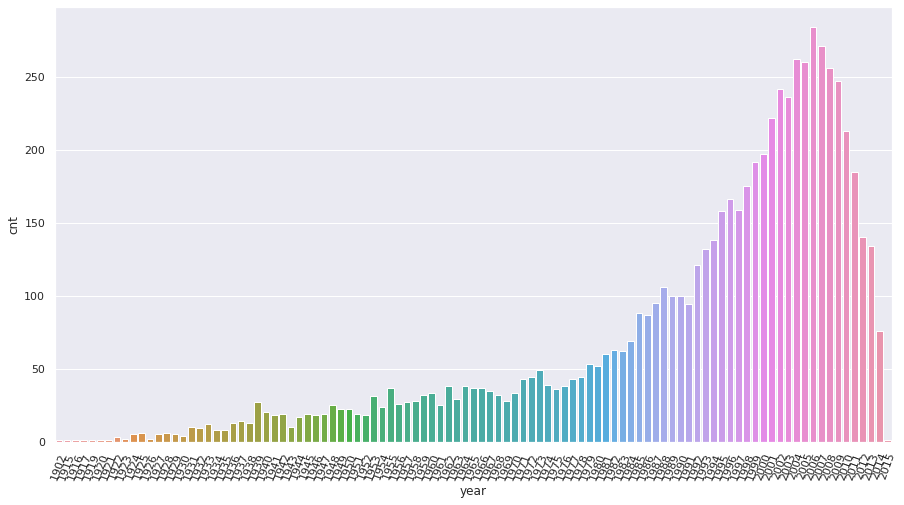

In [25]:
# 개봉 연도별 데이터 시각화
x = pd.DataFrame(year_data.groupby(['year']).size(), columns=['cnt']).reset_index()
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='year', y='cnt', data=x)#.barplot()
plt.xticks(rotation=70)

- 2000년 초에 많은 영화가 개봉함을 알 수 있다.

### director_data

In [26]:
director_data.head()

item   director
0  1237  nm0000005
1  5147  nm0000005
2  7327  nm0000005
3  2068  nm0000005
4  7396  nm0000005

In [28]:
#director_data.info() # 자료형 확인, 결측치 없음, 5905

In [29]:
print('감독 수: ', director_data.director.nunique()) # 1340명의 영화 감독
print('감독 정보가 있는 영화 수: ', len(director_data)) # 5905개의 영화에 감독정보가 있음.

감독 수:  1340
감독 정보가 있는 영화 수:  5905


In [30]:
print('감독별 영화 제작 수 top5')
print(director_data['director'].value_counts().head()) # 최대 44
print('감독별 영화 제작 수 bottom5')
print(director_data['director'].value_counts().tail()) # 최소 2

감독별 영화 제작 수 top5
nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
Name: director, dtype: int64
감독별 영화 제작 수 bottom5
nm1258686    2
nm0640740    2
nm0294379    2
nm0160840    2
nm0420982    2
Name: director, dtype: int64


In [31]:
# 감독 정보가 없는 영화 수
print(title_data.item.nunique() - director_data['item'].nunique()) #1304
print(round((title_data.item.nunique()-director_data['item'].nunique())/len(title_data)*100,2),'%') #19.16%

1304
19.16 %


- 전체 영화 중 감독 정보가 없는 영화는 1304개이고 이는 전체 영화 중에서 약 19.16%를 차지한다.
> 생각보다 많은 비율이다. 모델링 시 감독 정보를 그대로 반영할지, 평균이나 장르별 빈도수가 많은 감독으로 대체할지 등을 고려하자.

### writer_data

In [32]:
writer_data.head()

item     writer
0  1237  nm0000005
1  5147  nm0000005
2  7327  nm0000005
3  2068  nm0000005
4  7396  nm0000005

In [34]:
#writer_data.info() # 자료형 확인, 결측치 없음

In [35]:
print('작가 수: ', writer_data.writer.nunique()) # 2989명의 영화 작가
print('작가 정보가 있는 영화 수: ', len(writer_data)) # 11306개의 영화에 작가 정보가 있음.

작가 수:  2989
작가 정보가 있는 영화 수:  11306


In [36]:
print('작가별 영화 제작 수 top5')
print(writer_data['writer'].value_counts().head()) # 최대 47
print('작가별 영화 제작 수 bottom5')
print(writer_data['writer'].value_counts().tail()) # 최소 2

작가별 영화 제작 수 top5
nm0000095    47
nm0000636    35
nm0000175    32
nm0372942    30
nm0000108    29
Name: writer, dtype: int64
작가별 영화 제작 수 bottom5
nm0607694    2
nm0560945    2
nm1396121    2
nm1072409    2
nm1144419    2
Name: writer, dtype: int64


In [37]:
writer_cnt = writer_data['writer'].value_counts()
writer_cnt.describe()

count    2989.000000
mean        3.782536
std         2.993783
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        47.000000
Name: writer, dtype: float64

In [38]:
# 작가 정보가 없는 영화 수
print(title_data.item.nunique() - writer_data['item'].nunique()) #1159
print(round((title_data.item.nunique()-writer_data['item'].nunique())/len(title_data)*100,2),'%') #17.03%

1159
17.03 %


- 전체 영화 중 작가 정보가 없는 영화는 1159개이고, 이는 전체 영화 중에서 약 17.03%를 차지한다.
> 영화 감독 정보와 마찬가지로 생각보다 많은 비율이라고 판단된다. 모델링 시 작가 정보를 그대로 반영할지, 평균이나 장르별 빈도수가 많은 작가로 대체할지 등을 고려하자.

### genre_data

In [39]:
genre_data.head()

item     genre
0   318     Crime
1   318     Drama
2  2571    Action
3  2571    Sci-Fi
4  2571  Thriller

In [41]:
#genre_data.info() #자료형 확인, 결측치 없음

In [42]:
genre_data.item.nunique() #모든 영화에 대해 장르 정보가 다 있음.

6807

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


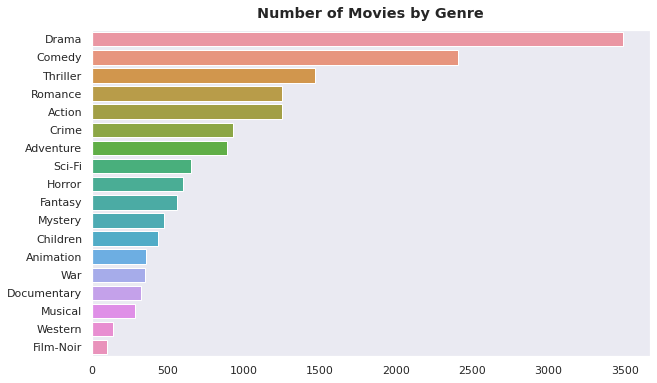

In [43]:
# 장르별 영화 개수 확인 (중복 허용)
num_genre = genre_data['genre'].value_counts()

fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(num_genre.values, num_genre.index, ax=ax)
ax.set_title("Number of Movies by Genre", fontsize="large", fontweight="bold", pad=12)
ax.grid(axis="x")

- Drama가 압도적으로 많다. 한 영화당 여러 장르가 포함되는 중복인걸 감안하면, 웬만한 영화는 Drama에 속한 것으로 보인다.

In [44]:
gen_cnt_all = pd.DataFrame(genre_data.genre.value_counts()/title_data.item.nunique()*100)

In [45]:
gen_cnt_all

genre
Drama        51.270751
Comedy       35.375349
Thriller     21.536653
Romance      18.378140
Action       18.304686
Crime        13.574262
Adventure    13.089467
Sci-Fi        9.593066
Horror        8.843837
Fantasy       8.182753
Mystery       6.919348
Children      6.346408
Animation     5.215220
War           5.083003
Documentary   4.745115
Musical       4.142794
Western       2.042016
Film-Noir     1.425004

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


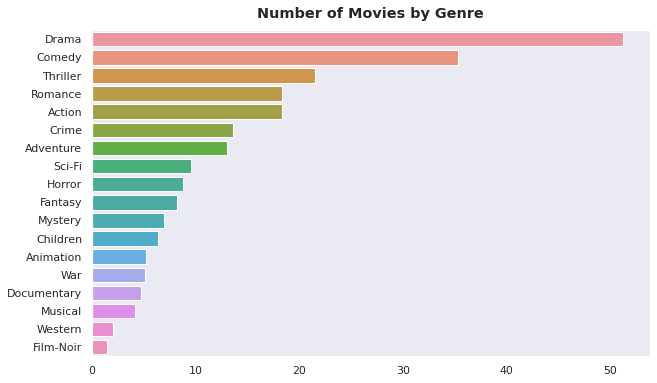

In [46]:
# 더 구체적으로, 전체 영화 개수에서의 각 장르별 영화 개수 비율을 확인해보자.
num_genre = genre_data.genre.value_counts()/title_data.item.nunique()*100
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(num_genre.values, num_genre.index, ax=ax)
ax.set_title("Number of Movies by Genre", fontsize="large", fontweight="bold", pad=12)
ax.grid(axis="x")

- (중복허용 감안하기) 전체 영화의 50% 이상이 Drama 장르에 속하고, 30%이상이 Comedy, 20%이상이 Thriller에 속한다.

# 2. 학습 데이터의 sparsity에 대해

#### 2.1 sparse ratio

In [47]:
num_train_users = train_df['user'].nunique()
num_train_items = train_df['item'].nunique()

print ("Number of unique train users: ", num_train_users)
print ("Number of unique train items: ", num_train_items)
print("Data sparsity ratio: ", 1 - len(train_df) / (num_train_users * num_train_items))
#special mission 코드 참고

Number of unique train users:  31360
Number of unique train items:  6807
Data sparsity ratio:  0.9758536052697853


- sparse 비율이 97%정도 된다.
> 사견) 난 굉장히 sparse하다고 보았는데, special mission 조교님께서 일반적인 추시 데이터셋에 비해 굉장히 dense한 데이터셋(행렬 상 이력이 많은 부분)라고 표현하셨다.

#### 2.2 실제 유저들이 영화 본 비율과 숫자

In [48]:
print(train_df.item.nunique())
print(title_data.item.nunique())

6807
6807


In [49]:
x = pd.DataFrame(train_df.groupby(['user']).size() / title_data.item.nunique(),
                 columns = ['item_cnt_ratio'])
x.describe()

item_cnt_ratio
count    31360.000000
mean         0.024146
std          0.022037
min          0.002351
25%          0.010430
50%          0.016747
75%          0.029382
max          0.427795

In [50]:
train_df.groupby(['user']).size().describe()

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
dtype: float64

- 유저들은 전체 영화 목록 중 평균적으로 2.4%(164.3개),
 최대 42.7%(2912개), 최소 0.23%(16개)의 영화들을 보았다.

#### 2.3 같은 유저가 같은 영화를 재시청했는지

In [51]:
train_df[train_df[['user', 'item']].duplicated(keep=False)]
# 같은 유저의 재시청 기록 없음.

Empty DataFrame
Columns: [user, item, time]
Index: []

In [53]:
pd.__version__

'1.0.1'

# Truth's EDA(timestamp와 genre에 대한 해석)
- 가장 활동을 많이한 유저(top 3)들의 timestamp에 따른 영화 평점 부여 기록에 대한 해석
- top 10 영화에 대한 데이터, 언제 가장 많이 평가되었는지 (2008.10)
- genre가 많은 영화가 count에서 유리한지에 대한 EDA

### Truth 뒤에서 사용할 수도 있는 데이터 처리
--------------

In [59]:
director_df = pd.merge(train_df, director_data, on=['item'])
director_id = director_df.value_counts('director').index[:10]

side_df = []
for director in director_id:
    side_df.append(director_df.loc[director_df['director'] == director])

director_top = pd.concat(side_df)

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [ ]:
writer_df = pd.merge(train_df, writer_data, on=['item'])
writer_id = writer_df.value_counts('writer').index[:10]

side_df = []
for writer in writer_id:
    side_df.append(writer_df.loc[writer_df['writer'] == writer])

writer_top = pd.concat(side_df)

In [ ]:
title_df = pd.merge(train_df, title_data, on=['item'])
title_id = title_df.value_counts('title').index[:10]

side_df = []
for title in title_id:
    side_df.append(title_df.loc[title_df['title'] == title])

title_top = pd.concat(side_df)

In [ ]:
year_df = pd.merge(train_df, year_data, on=['item'])
year_id = year_df.value_counts('year').index[:10]

side_df = []
for year in year_id:
    side_df.append(year_df.loc[year_df['year'] == year])

year_top = pd.concat(side_df)

In [ ]:
genre_df = pd.merge(train_df, genre_data, on=['item'])
genre_top = genre_df

### Truth 1. 유저 별 장르 선호도(top 3)

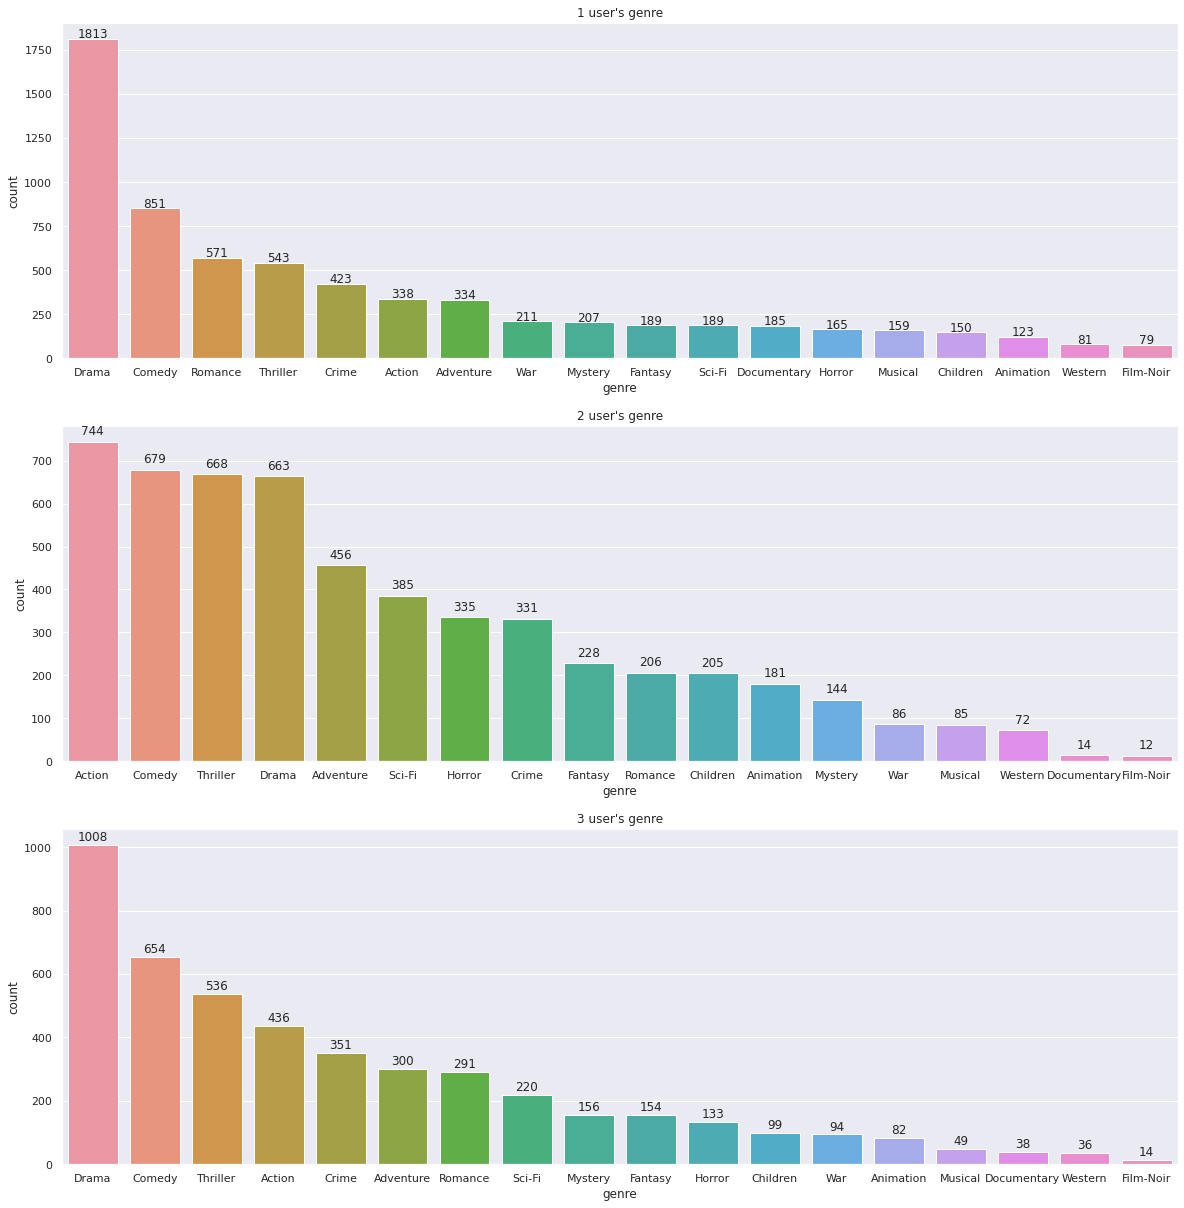

In [ ]:
active_user_ids = train_df.value_counts('user').index[:10]
popular_movie_ids = train_df.value_counts('item').index[:10]

fig, ax = plt.subplots(3,1, figsize=(20,21))
for idx in range(3):
    user_id = active_user_ids[idx] # specific user id
    genre_user = genre_top[genre_top['user'] == user_id]
    sns.countplot(x = 'genre', data=genre_user, order = genre_user['genre'].value_counts().index, ax=ax[idx])
    ax[idx].set_title(f"{idx+1} user's genre")

    for i, j in enumerate(genre_user['genre'].value_counts().values):
        ax[idx].text(i, j+25, j, va='center', ha='center')

plt.show()

### Truth 2. 주로 언제 영화에 평점을 부여했는지 유저 별 경향(top 3)
  -> timestamp에 대한 분석

In [ ]:
import time
unix_time = 1230782529 # some random timestamp from dataset
converted_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(unix_time))

print ("initial unix-based timestamp: %s\nconverted time: %s"%(unix_time, converted_time))

initial unix-based timestamp: 1230782529
converted time: 2009-01-01 04:02:09


/tmp/ipykernel_95761/1994017894.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_df['time'] = converted_df['time'].apply(lambda x : time.strftime('%Y-%m', time.localtime(x)))
/tmp/ipykernel_95761/1994017894.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_df['time'] = converted_df['time'].apply(lambda x : time.strftime('%Y-%m', time.localtime(x)))
/tmp/ipykernel_95761/1994017894.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

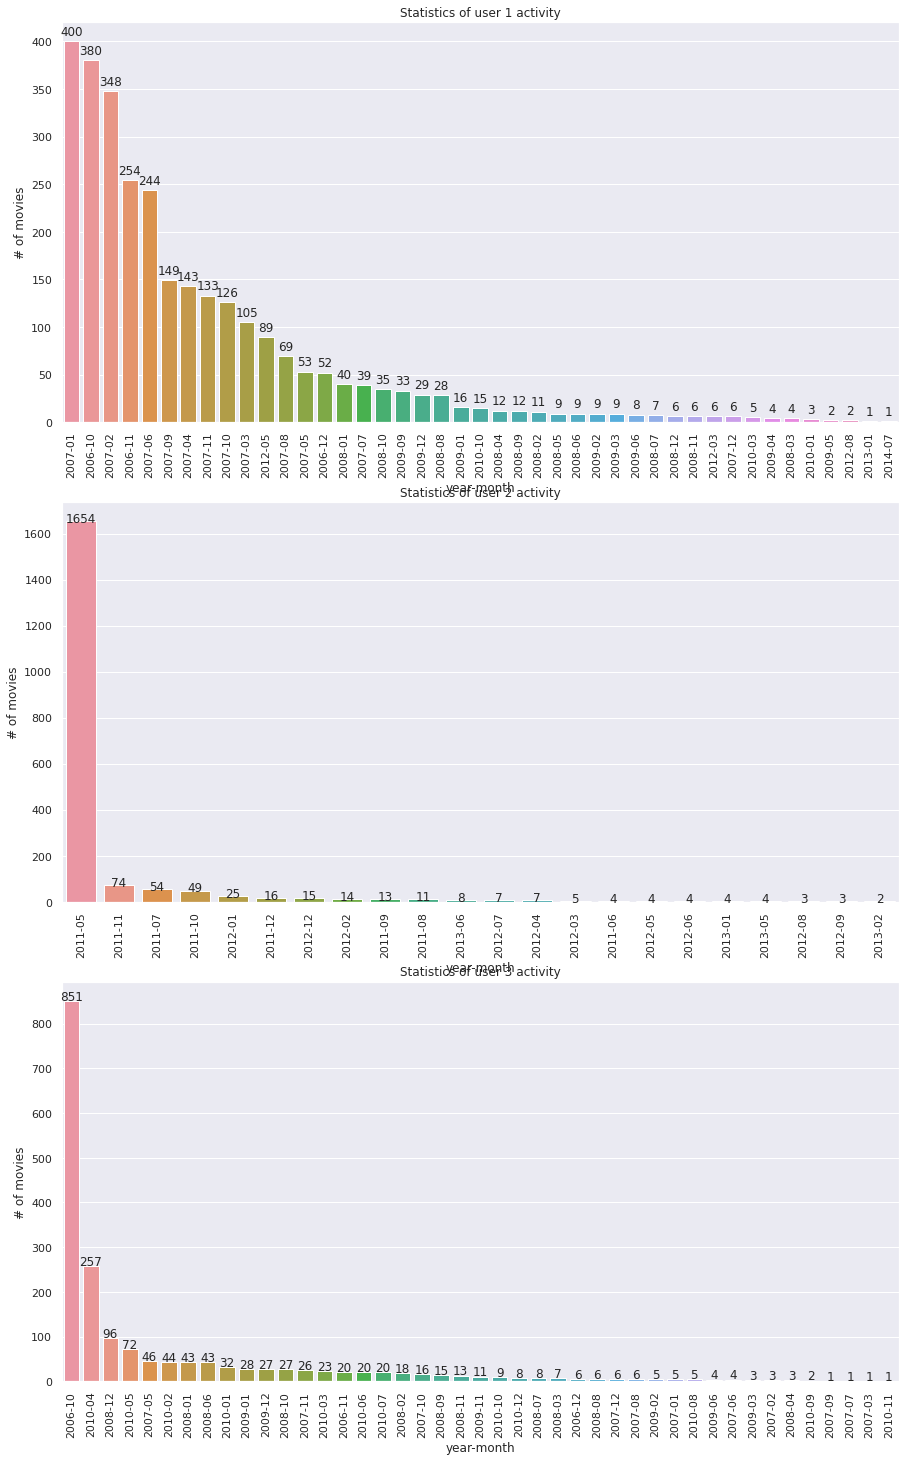

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15,25))

for idx in range(3):
    old_df = train_df[train_df['user'] == active_user_ids[idx]] # Specific user id
    converted_df = old_df
    converted_df['time'] = converted_df['time'].apply(lambda x : time.strftime('%Y-%m', time.localtime(x)))
    
    sns.countplot(x = 'time', data=converted_df, order=converted_df['time'].value_counts().index, ax=ax[idx])
    ax[idx].set_xlabel('year-month')
    ax[idx].set_ylabel('# of movies')
    ax[idx].set_title(f'Statistics of user {idx+1} activity')
    for tick in ax[idx].get_xticklabels():
        tick.set_rotation(90)
    
    for i, j in enumerate(converted_df['time'].value_counts().values):
        ax[idx].text(i, j+10, j, va='center', ha='center')

In [ ]:
# 1번 유저의 시청 기록
converted_df[:20]

user  item     time
916349  24219  1304  2006-10
916350  24219   923  2006-10
916351  24219   353  2006-10
916352  24219   653  2006-10
916353  24219   920  2006-10
916354  24219  1653  2006-10
916355  24219   173  2006-10
916356  24219   832  2006-10
916357  24219  2640  2006-10
916358  24219  2858  2006-10
916359  24219  1210  2006-10
916360  24219   296  2006-10
916361  24219   457  2006-10
916362  24219   592  2006-10
916363  24219   356  2006-10
916364  24219  7361  2006-10
916365  24219  5349  2006-10
916366  24219   593  2006-10
916367  24219   110  2006-10
916368  24219  1729  2006-10

첫번째 유저의 데이터를 봤을 때, time의 간격이 매우 짧은 것을 확인할 수 있다. 이는 영화를 클릭하고 곧바로 다른 영화를 클릭한 것으로 볼 수 있다.

`클릭 = 시청`으로 단순하게 생각하면 유의미하지 않은 결과가 나올 것 같은 느낌이 든다.

클릭과 클릭 사이의 시간이 일정 수준 이상이 되었을 때 시청을 했다라고 고려를 해야할 것 같다.

----

### Truth 3. 가장 인기 많은 영화(top 10)에 평점을 부여한 시점에 대한 데이터

In [ ]:
from tqdm import tqdm
pop_movies = []
for i in tqdm(popular_movie_ids):
    pop_movies.append(train_df.loc[train_df['item']==i])
    
pop_movies = pd.concat(pop_movies)

100%|██████████| 10/10 [00:00<00:00, 113.99it/s]


In [ ]:
pop_movies['time'] = pop_movies['time'].apply(lambda x : time.strftime('%Y-%m', time.localtime(x)))
pop_movies_cnt = pop_movies['time'].value_counts()

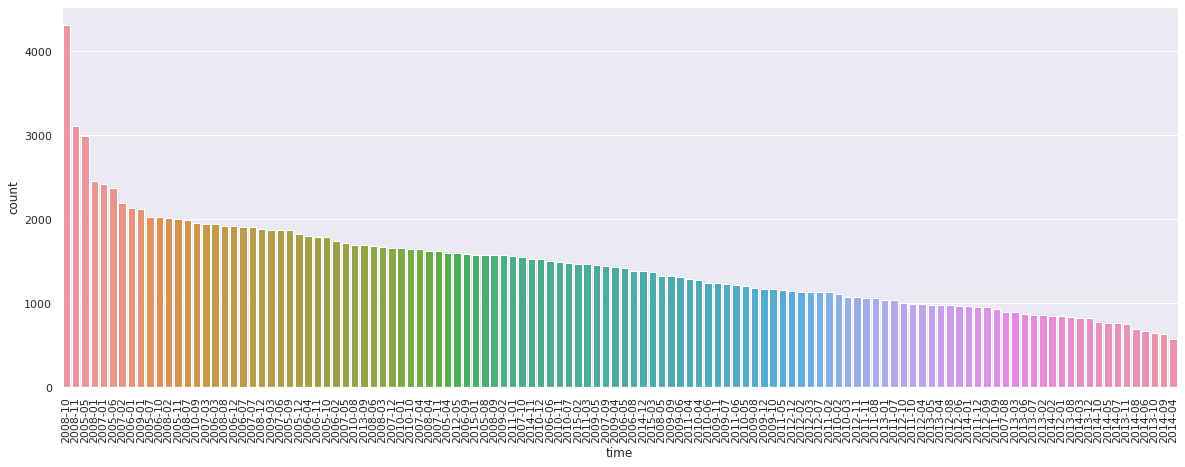

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x='time', data=pop_movies, order=pop_movies_cnt.index)
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
temp = pop_movies.loc[pop_movies['time']=='2008-10']['item'].value_counts().index
print('2008-10 Best Movies')
for i, j in enumerate(temp):
    title = title_data.loc[title_data['item']==j, 'title'].values[0]
    print(f"{i+1:>2} : {title}")

2008-10 Best Movies
 1 : Matrix, The (1999)
 2 : Fight Club (1999)
 3 : Pulp Fiction (1994)
 4 : Shawshank Redemption, The (1994)
 5 : Forrest Gump (1994)
 6 : Lord of the Rings: The Fellowship of the Ring, The (2001)
 7 : Silence of the Lambs, The (1991)
 8 : Lord of the Rings: The Return of the King, The (2003)
 9 : Lord of the Rings: The Two Towers, The (2002)
10 : American Beauty (1999)


### Truth 4. 장르 데이터(한 영화에 여러 장르가 있는 경우)

In [ ]:
from copy import deepcopy
gen_top = deepcopy(genre_top)
gen_top['time'] = gen_top['time'].apply(lambda x : time.strftime('%Y-%m', time.localtime(x)))
gen_top

user    item     time      genre
0             11    4643  2009-01     Action
1             11    4643  2009-01  Adventure
2             11    4643  2009-01      Drama
3             11    4643  2009-01     Sci-Fi
4            189    4643  2011-04     Action
...          ...     ...      ...        ...
14126319  131347  102880  2013-06  Adventure
14126320  131347  102880  2013-06     Sci-Fi
14126321  134144  102880  2013-06     Action
14126322  134144  102880  2013-06  Adventure
14126323  134144  102880  2013-06     Sci-Fi

[14126324 rows x 4 columns]

단순히 장르가 많으면 count에 유리하다...?? genre의 조합을 embedding 하거나 여러개로 나누지 않고 한 줄에 표시하는 방법을 고려해야겠다.

timestamp도 적절한 방법을 고려해봐야 할 것 같다...!!

- Action 영화 수가 Thriller나 Romance보다 적음에도 불구하고 유저들은 많이 보았다.
- Adventure도 영화 수에 비해 상대적으로 실제 유저들이 많이 보았다.
- Horror는 영화 수에 비해 상대적으로 실제 유저들이 적게 보았다.

# Brill's EDA(유저 데이터가 보여주는 여러 경향)
- 유저 별 장르 선호도와 전체 장르(유저들이 시청한 영화의 장르) 선호도 분포 비교
- timestamp로 알아본 유저들이 유입된 시기

### Brill 1. user의 장르 선호도와 전체 장르(유저들이 시청한 영화의 장르) 분포 비교

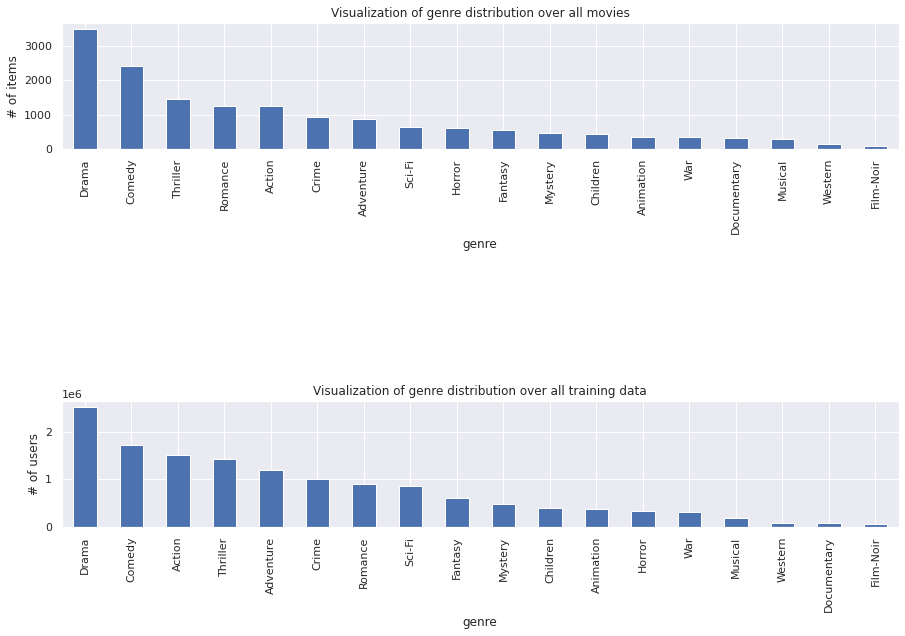

In [ ]:
plt.subplot(2,1,1)
genre_data['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('genre')
plt.ylabel('# of items')
plt.title('Visualization of genre distribution over all movies')

plt.subplot(2,1,2)
genre_top['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('genre')
plt.ylabel('# of users')
plt.title('Visualization of genre distribution over all training data')

plt.subplots_adjust(hspace=2.0, top=1.0)

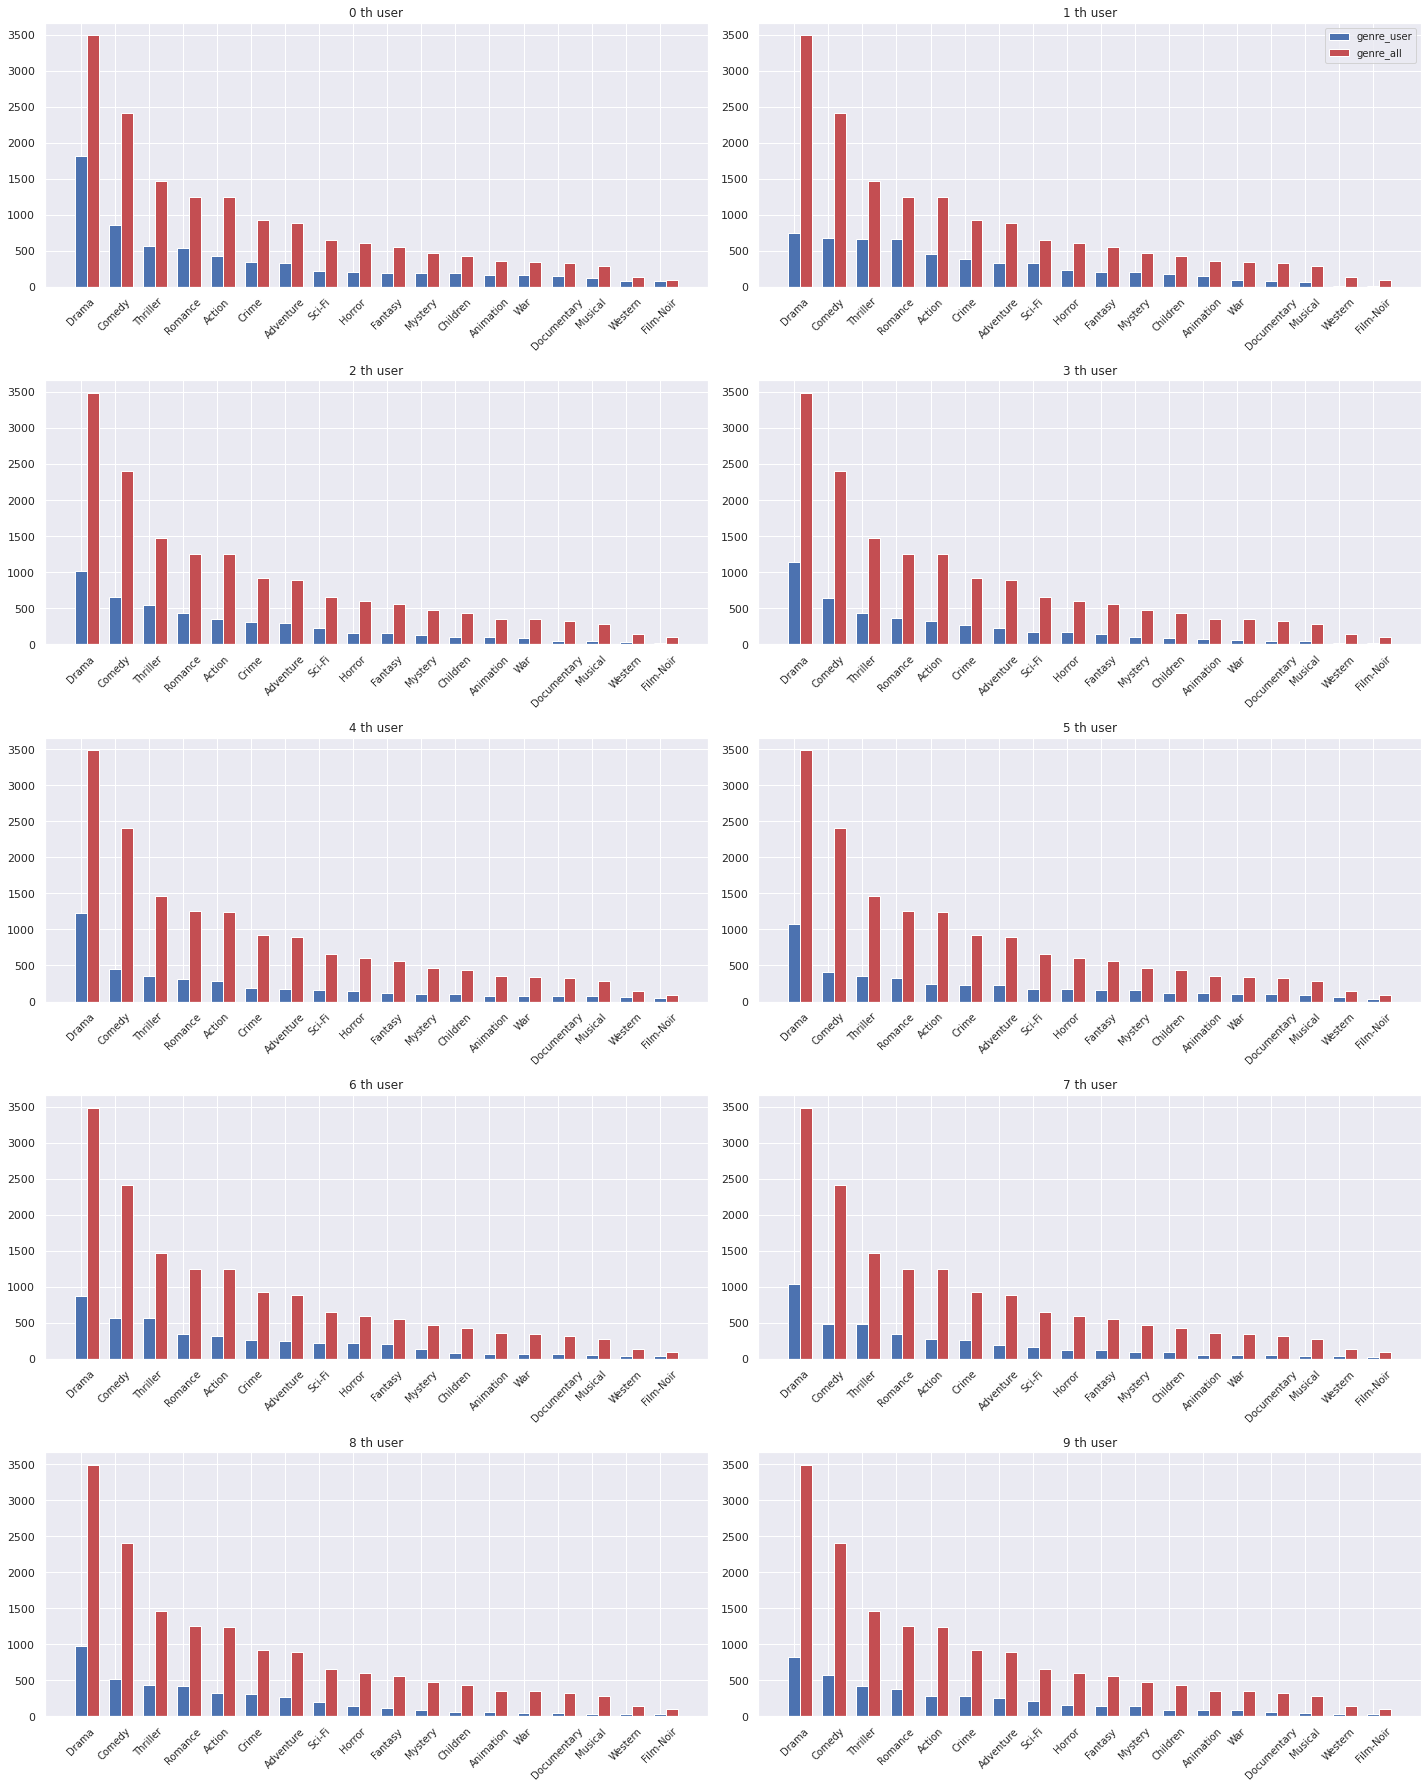

In [ ]:
genre_order= list(genre_data['genre'].value_counts().index)
plt.figure(figsize=(20,25))
for i in range(10):
    plt.subplot(5,2,i+1)
    label = list(genre_data['genre'].value_counts().index)
    index = np.arange(len(label))
    user_id = active_user_ids[i] # specific user id
    genre_user = genre_top[genre_top['user'] == user_id]
    p1= plt.bar(index,genre_user['genre'].value_counts(),0.35,color='b')
    p2= plt.bar(index+0.35,genre_data['genre'].value_counts(), 0.35,color='r')
    plt.title(f'%d th user'%i)
    plt.xticks(index, label, fontsize=10,rotation=45)
    plt.tight_layout()
    if i==1:
        plt.legend((p1[0], p2[0]), ('genre_user', 'genre_all'), fontsize=10)

-> active user의 경우 장르 선호도가 전체 장르 선호도 분포와 거의 유사하다

### Brill 2. 유저들에게 가장 인기있는 감독10명이 선호하는 장르와, 전체 감독의 장르 선호도 비교

<BarContainer object of 18 artists>

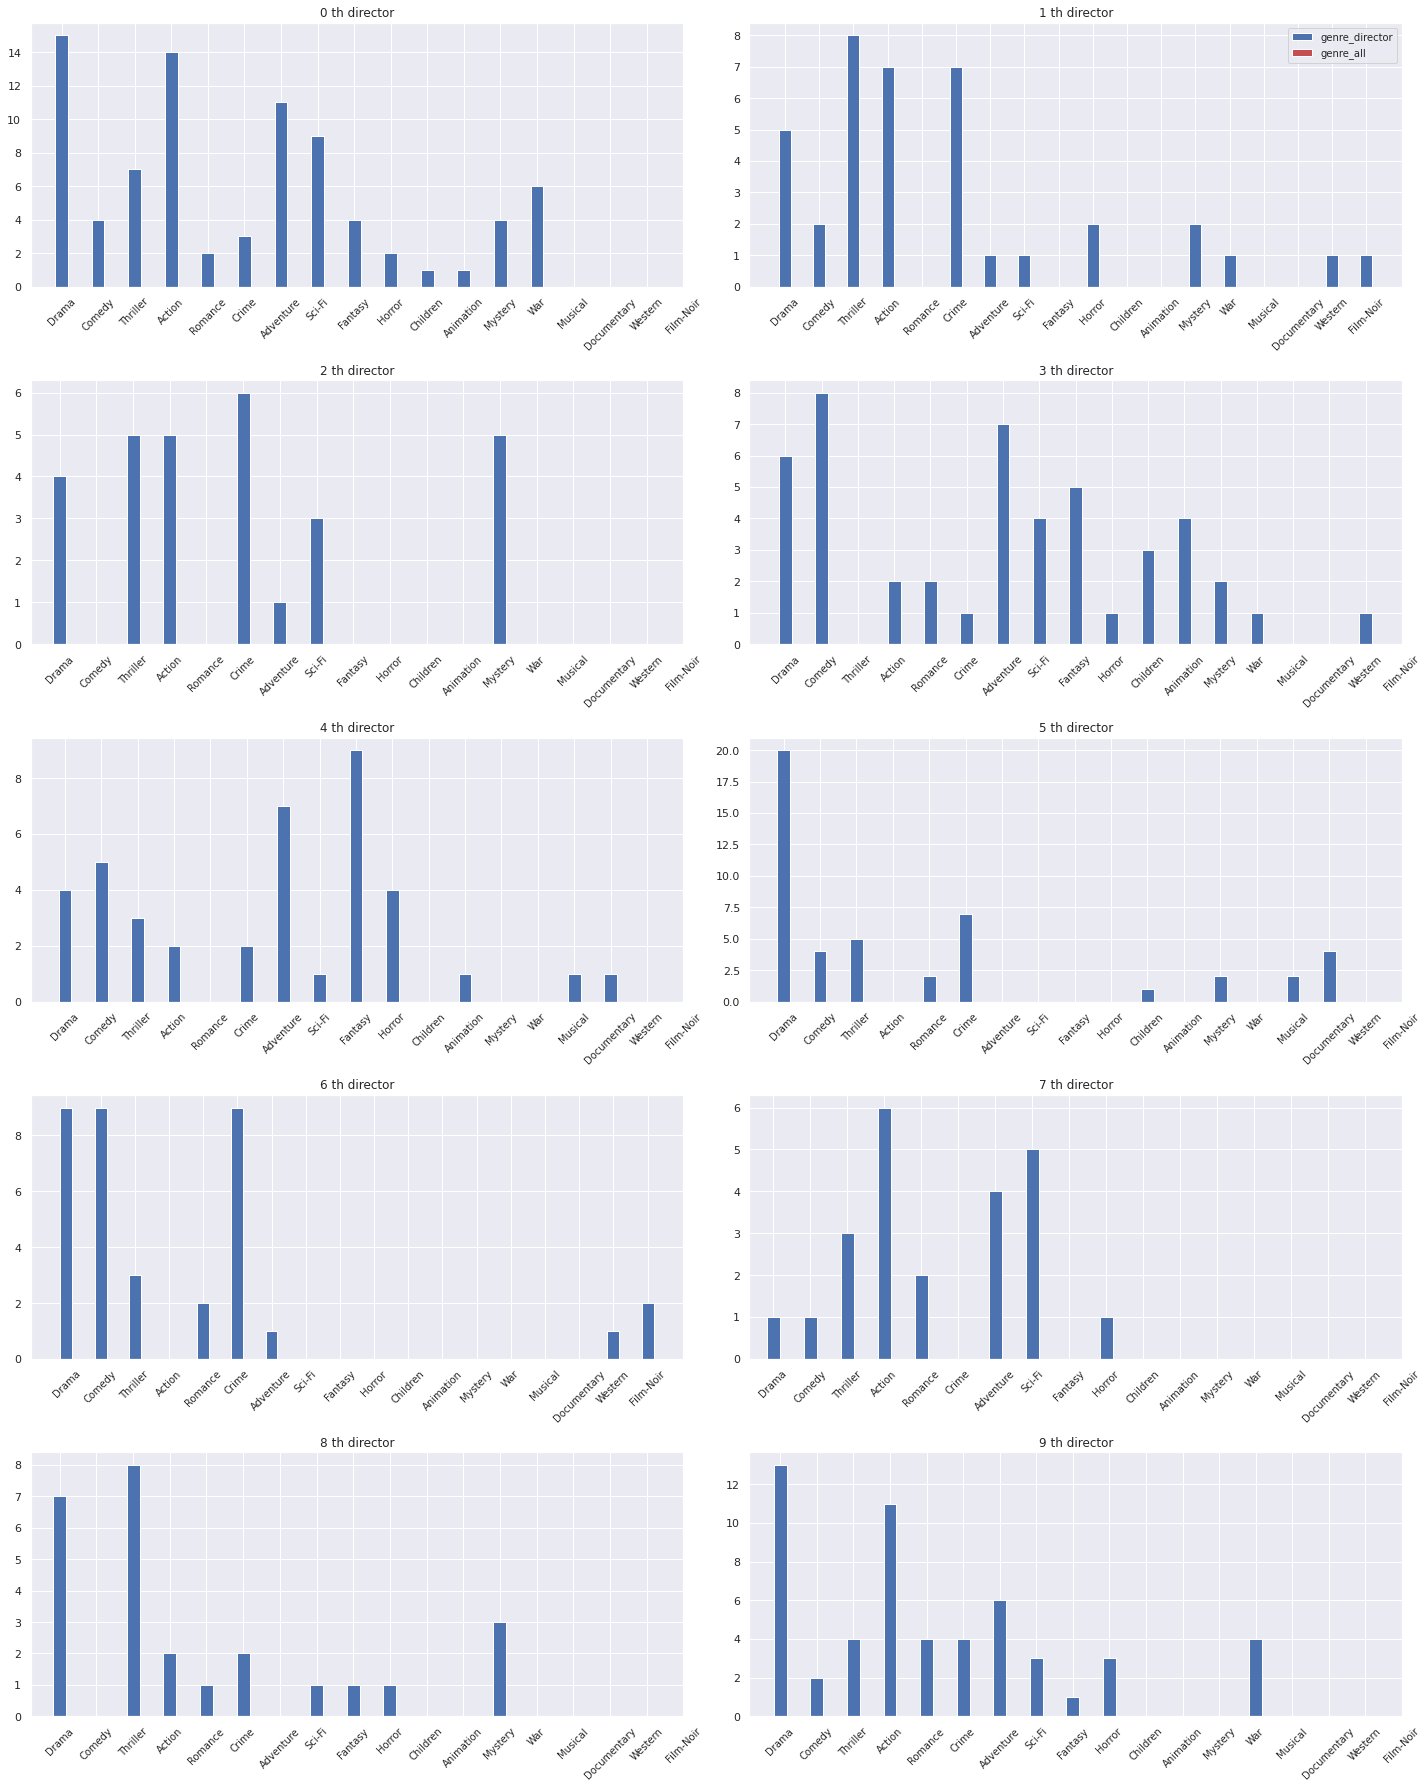

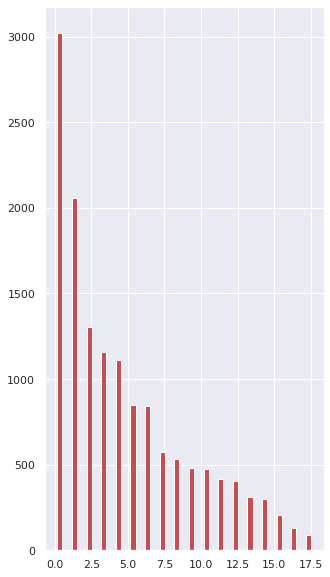

In [ ]:
### 유저들에게 가장 인기있는 감독10명이 선호하는 장르와, 전체 감독의 장르 선호도 비교
genre_direc= pd.merge(director_data,genre_data, on=['item'])
side_df = []
# director_id= 유저들에게 가장 인기있는 감독 10명/의 데이터만 추출
for director in director_id:
    side_df.append(genre_direc.loc[genre_direc['director'] == director])

genre_direc_top = pd.concat(side_df)

label = list(genre_direc['genre'].value_counts().index)
index = np.arange(len(label))

plt.figure(figsize=(20,25))

for i in range(10):
    plt.subplot(5,2,i+1)

    di = director_id[i]
    genre_user = genre_direc_top[genre_direc_top['director'] == di]
    comp= pd.merge(pd.DataFrame(genre_direc['genre'].value_counts()).reset_index(),
pd.DataFrame(genre_user['genre'].value_counts()).reset_index(), 
how='left',on=['index'])
    comp.fillna(0)

    p1= plt.bar(index,comp['genre_y'],0.35,color='b')

    plt.title(f'%d th director'%i)
    plt.xticks(index, label, fontsize=10,rotation=45)
    plt.tight_layout()
    if i==1:
        plt.legend((p1[0], p2[0]), ('genre_director', 'genre_all'), fontsize=10)
plt.figure(figsize=(5,10))
plt.bar(index+0.35,comp['genre_x'], 0.35,color='r')

-> 반면 유저에게 인기있는 감독이 선호하는 영화장르는 굉장히 불규칙적이다

### Brill 3. 유저들이 유입되는 시기에 대한 분석

In [ ]:
### 유저들이 많이 유입된 시기
time_changer= lambda x: time.strftime('%Y-%m', time.localtime(x))
# 유저들이 맨처음 시청한 기록의 데이터만 추출
time_df= train_df.drop_duplicates('user', keep='first')
time_df['time']= time_df['time'].apply(time_changer)


/tmp/ipykernel_95761/109802462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['time']= time_df['time'].apply(time_changer)


Text(42, 731, '2008-10\n731')

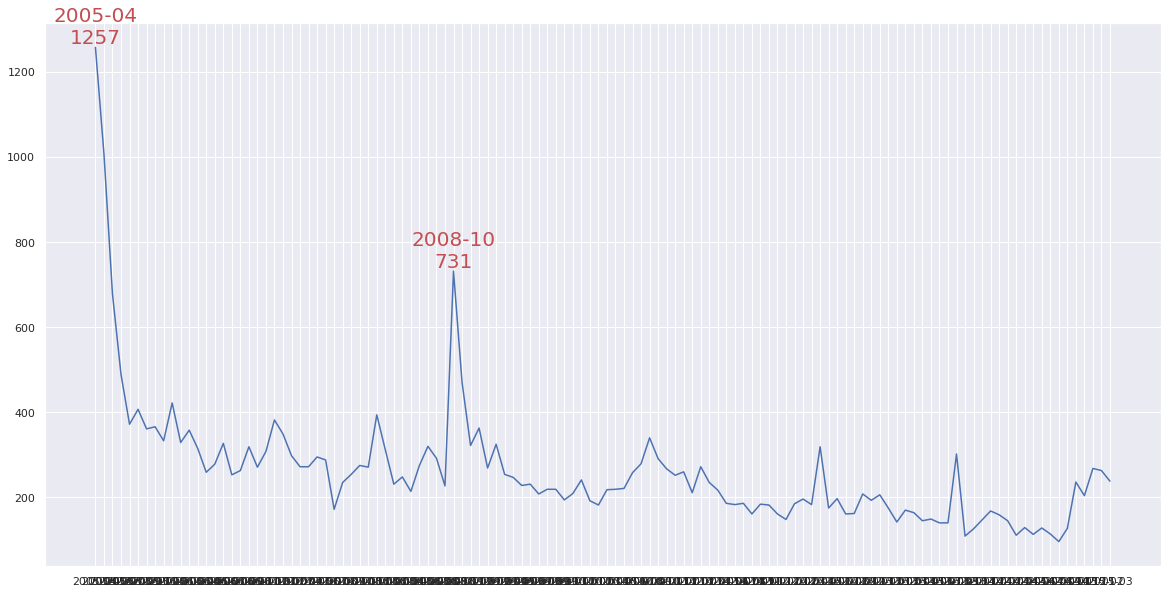

In [ ]:
plt.figure(figsize=(20,10))
temp=time_df.groupby('time')['user'].count()
plt.plot(temp)

# 최대값 표시
plt.text(temp.argmax() ,max(temp),
        temp.index[temp.argmax()] + '\n' + str(temp[temp.argmax()]),
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom',
         fontsize= 20
         )

# 2번째
plt.text(42 ,max(temp[temp.index>='2008-01']),
        temp.index[42] + '\n' + str(max(temp[temp.index>='2008-01'])),
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom',
         fontsize= 20
         )

In [ ]:
temp.values

array([1257, 1007,  677,  488,  371,  406,  360,  365,  332,  421,  328,
        357,  314,  258,  277,  326,  252,  262,  318,  270,  307,  381,
        348,  297,  271,  271,  294,  287,  171,  234,  253,  274,  270,
        393,  311,  230,  247,  213,  274,  319,  291,  226,  731,  470,
        321,  362,  268,  324,  253,  246,  227,  230,  207,  218,  218,
        193,  208,  240,  191,  181,  217,  218,  220,  257,  278,  339,
        290,  266,  251,  259,  210,  271,  234,  216,  185,  182,  185,
        160,  183,  181,  160,  147,  184,  195,  182,  318,  174,  196,
        160,  161,  207,  192,  205,  174,  141,  169,  163,  144,  148,
        139,  139,  301,  108,  125,  146,  167,  158,  144,  110,  128,
        112,  127,  113,   95,  126,  235,  203,  267,  262,  237])

-> sequence model 사용한다면, 활용해볼 수 있는 EDA인듯하지만, 정확히 어떻게 쓰일 수 있을지는 아직 잘 모르겠다,,ㅎ

#### Brill 3-1. 2008년 10월에 대한 분석

In [ ]:
plt.figure(figsize=(10,10))
temp= time_df[time_df['time']=='2008-10']
temp= temp.groupby(by='item')['user'].count().sort_values(ascending=False)
temp[:20]

item
1215     17
1233     14
1639     13
2078     11
2420     10
1242     10
2076     10
2871      9
431       8
3107      8
1376      8
2908      7
2948      7
1625      7
48385     7
2947      7
471       7
2150      7
3252      7
2599      7
Name: user, dtype: int64

<Figure size 720x720 with 0 Axes>

In [ ]:
print(title_data[title_data['item']==1215])
print(title_data[title_data['item']==1233])
print(title_data[title_data['item']==1639])
print(title_data[title_data['item']==2078])
print(title_data[title_data['item']==2420])

      item                    title
3424  1215  Army of Darkness (1993)
     item                         title
292  1233  Boot, Das (Boat, The) (1981)
     item               title
343  1639  Chasing Amy (1997)
     item                    title
490  2078  Jungle Book, The (1967)
     item                   title
531  2420  Karate Kid, The (1984)


# 3. 장르별 영화에 대해

#### 3.1 실제 유저가 많이 본 영화 장르 파악
- (위는 장르 데이터에서 진행. 이번엔 학습 데이터에서 진행)

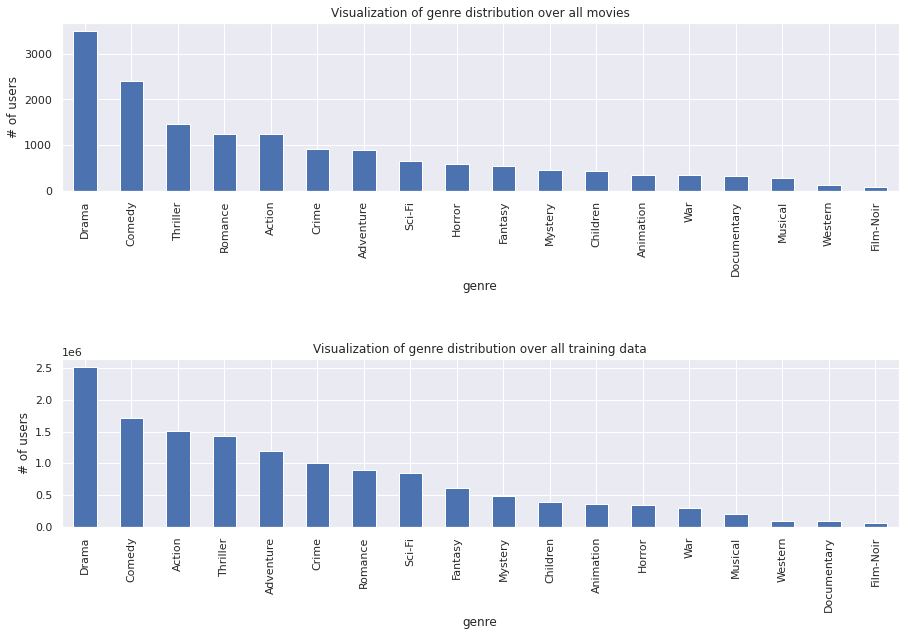

In [ ]:
genre_df = pd.merge(train_df, genre_data, on=['item'])

plt.subplot(2,1,1)
genre_data['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('genre')
plt.ylabel('# of users')
plt.title('Visualization of genre distribution over all movies')

plt.subplot(2,1,2)
genre_df['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('genre')
plt.ylabel('# of users')
plt.title('Visualization of genre distribution over all training data')

plt.subplots_adjust(hspace=1.0, top=1.0)
# Special mission eda 코드 참고

### 3.2 영화별 최소와 최대 장르 수

In [ ]:
genre_data

item        genre
0         318        Crime
1         318        Drama
2        2571       Action
3        2571       Sci-Fi
4        2571     Thriller
...       ...          ...
15928  109850        Drama
15929    8605       Action
15930    8605       Comedy
15931    3689       Comedy
15932    8130  Documentary

[15933 rows x 2 columns]

In [ ]:
genre_data.groupby(['item']).size().describe()

count    6807.000000
mean        2.340679
std         1.114049
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
dtype: float64

- 영화별 최소 장르는 1개, 최대 장르 수는 10개. 각 영화당 평균적으로 2.3개의 장르가 있다.

In [ ]:
genre_data.groupby(['genre']).size().describe()

count      18.000000
mean      885.166667
std       866.208252
min        97.000000
25%       348.250000
50%       579.500000
75%      1165.500000
max      3490.000000
dtype: float64

#### Juke's EDA(장르 별로 2개 이상의 장르가 함께 영화에 나오는 빈도)

##### Juke 1. 장르가 함께 영화에 쓰이는 빈도에 대한 table

In [ ]:
genre_distribution = pd.DataFrame(np.zeros((18,18)),index=genre_data.groupby(['genre']).groups.keys(), columns = genre_data.groupby(['genre']).groups.keys())
genre_group = genre_data.groupby(['genre'])
for i in genre_group.groups:
    for j in genre_group.groups:
        genre_distribution[i][j] = len([value for value in list(genre_group.get_group(i).set_index('genre')['item']) if value in list(genre_group.get_group(j).set_index('genre')['item'])])

genre_distribution

Action  Adventure  Animation  Children  Comedy  Crime  \
Action       1246.0      439.0       68.0      48.0   276.0  298.0   
Adventure     439.0      891.0      161.0     200.0   272.0   50.0   
Animation      68.0      161.0      355.0     203.0   161.0   15.0   
Children       48.0      200.0      203.0     432.0   229.0    9.0   
Comedy        276.0      272.0      161.0     229.0  2408.0  255.0   
Crime         298.0       50.0       15.0       9.0   255.0  924.0   
Documentary     3.0        2.0        2.0       1.0    38.0    3.0   
Drama         394.0      251.0       58.0      79.0   763.0  515.0   
Fantasy       142.0      235.0      123.0     146.0   205.0   16.0   
Film-Noir       5.0        2.0        2.0       0.0     3.0   55.0   
Horror         87.0       22.0        8.0       2.0    98.0   42.0   
Musical         3.0       36.0       60.0      69.0   139.0    7.0   
Mystery        61.0       31.0       11.0      11.0    62.0  145.0   
Romance        78.0       87.0       35.0      34.0   654.0   65.0   
Sci-Fi        313.0      207.0       72.0      35.0   123.0   20.0   
Thriller      503.0      164.0       11.0       4.0   148.0  477.0   
War           115.0       53.0        7.0       3.0    45.0   12.0   
Western        37.0       30.0        4.0       5.0    32.0    9.0   

             Documentary   Drama  Fantasy  Film-Noir  Horror  Musical  \
Action               3.0   394.0    142.0        5.0    87.0      3.0   
Adventure            2.0   251.0    235.0        2.0    22.0     36.0   
Animation            2.0    58.0    123.0        2.0     8.0     60.0   
Children             1.0    79.0    146.0        0.0     2.0     69.0   
Comedy              38.0   763.0    205.0        3.0    98.0    139.0   
Crime                3.0   515.0     16.0       55.0    42.0      7.0   
Documentary        323.0    17.0      1.0        0.0     0.0     21.0   
Drama               17.0  3490.0    158.0       56.0   142.0    101.0   
Fantasy              1.0   158.0    557.0        1.0    70.0     48.0   
Film-Noir            0.0    56.0      1.0       97.0     2.0      1.0   
Horror               0.0   142.0     70.0        2.0   602.0      8.0   
Musical             21.0   101.0     48.0        1.0     8.0    282.0   
Mystery              2.0   260.0     47.0       25.0   115.0      4.0   
Romance              1.0   792.0    112.0        9.0    13.0     85.0   
Sci-Fi               1.0   168.0     71.0        3.0   119.0      5.0   
Thriller             1.0   702.0     74.0       45.0   328.0      4.0   
War                 17.0   276.0      7.0        0.0     2.0      3.0   
Western              0.0    49.0      2.0        1.0     4.0      7.0   

             Mystery  Romance  Sci-Fi  Thriller    War  Western  
Action          61.0     78.0   313.0     503.0  115.0     37.0  
Adventure       31.0     87.0   207.0     164.0   53.0     30.0  
Animation       11.0     35.0    72.0      11.0    7.0      4.0  
Children        11.0     34.0    35.0       4.0    3.0      5.0  
Comedy          62.0    654.0   123.0     148.0   45.0     32.0  
Crime          145.0     65.0    20.0     477.0   12.0      9.0  
Documentary      2.0      1.0     1.0       1.0   17.0      0.0  
Drama          260.0    792.0   168.0     702.0  276.0     49.0  
Fantasy         47.0    112.0    71.0      74.0    7.0      2.0  
Film-Noir       25.0      9.0     3.0      45.0    0.0      1.0  
Horror         115.0     13.0   119.0     328.0    2.0      4.0  
Musical          4.0     85.0     5.0       4.0    3.0      7.0  
Mystery        471.0     52.0    56.0     303.0    4.0      3.0  
Romance         52.0   1251.0    39.0      97.0   51.0     14.0  
Sci-Fi          56.0     39.0   653.0     229.0   10.0      4.0  
Thriller       303.0     97.0   229.0    1466.0   38.0     11.0  
War              4.0     51.0    10.0      38.0  346.0     10.0  
Western          3.0     14.0     4.0      11.0   10.0    139.0

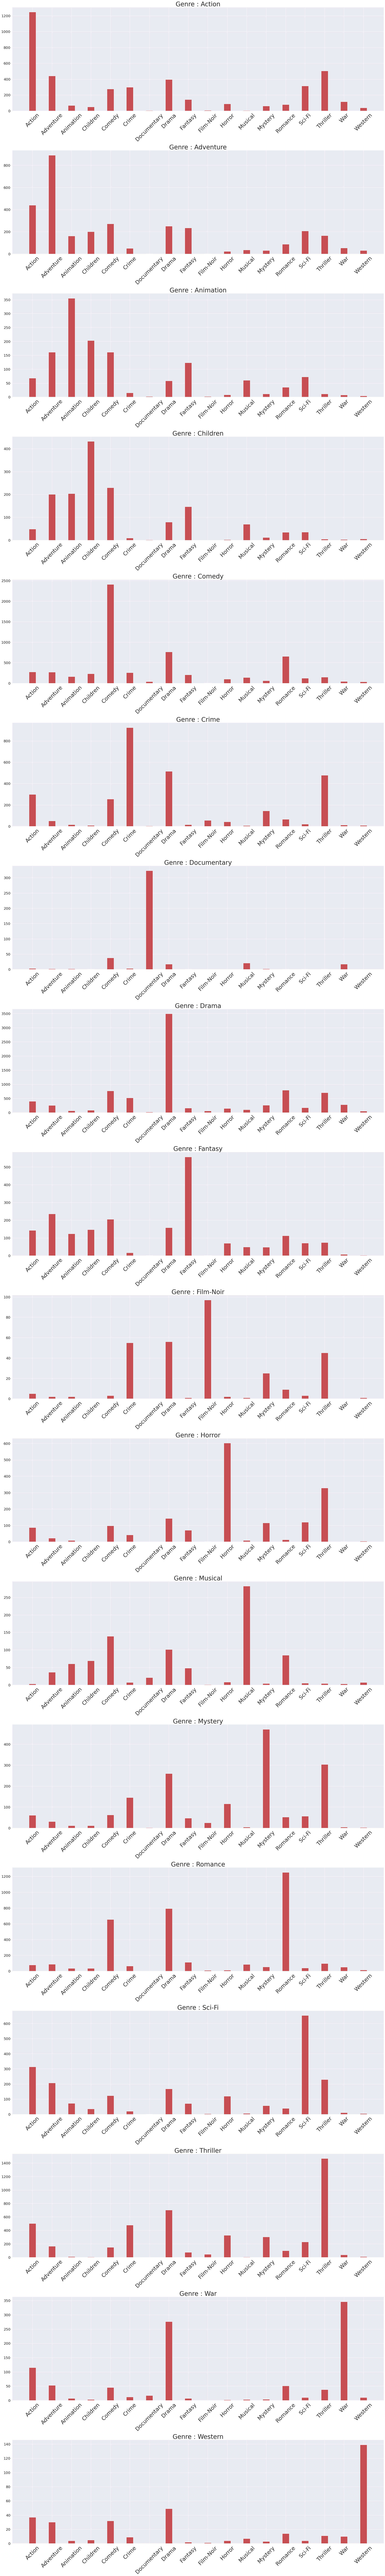

In [ ]:
plt.rcParams.update({'axes.labelsize' : 20, 'axes.titlesize' : 35})
plt.figure(figsize=(30,200))
j = 0
for i in genre_group.groups:
    plt.subplot(18,1,j+1)
    label = list(genre_distribution[i])
    index = np.arange(len(list(genre_distribution[i])))
    p1= plt.bar(index,label,0.35,color='r')
    plt.title(f'Genre : {i}')
    plt.xticks(index, list(genre_group.groups), fontsize=30,rotation=45)
    plt.yticks(fontsize = 20)
    #plt.bar(i,i,color = 'gray')
    plt.tight_layout()
    j+=1
    

- Action : Adventure, Comedy, Crime, Drama, Sci-Fi,Thriller(Animation, Children, Documentary, Film-Noir, Musical, Mystery, Western 제외 고루 분포)

- Adventure : Action, Children, Comedy, Drama, Fantasy, Sci-Fi(Crime, Documentary, Film-Noir, Horror, Musical, Mystery, War, Western 제외 고루 분포

- Animation : Action, Adventure, Children, Comedy, Fantasy(Crime, Documentary, Film-Noir, Horror, Mystery, Thriller, War, Western제외 고루 분포)

- Children : Adventure, Animation, Comedy, Fantasy(Action, Crime, Documentary, Film-Noir, Horror, Mystery, Thriller, War, Western 제외 고루 분포)

- Comedy : Drama, Romance(이 2개가 좀 많지만, 꽤나 고르게 분포)

- Crime : Action, Comedy, Drama, Thriller(몇 장르에만 치중)

- Documentary : Comedy, Drama, Musical, War(그나마 관련 있는 장르와도 관련성이 떨어짐. 자신의 장르에만 치중)

- Drama : Action, Comedy, Crime, Romance, Thriller, war(분포가 너무 커서 그렇지 고루 분포)

- Fantasy : 고루 분포 (Documentary, Film-Noir, war, Western 제외)

- Film-Noir : Crime, Drama, Mystery, Thriller (몇 장르에 치중)

- Horror : Action, Comedy, Drama, Fantasy, Mystery, Sci-Fi, Thriller(몇몇 장르 제외 고루분포)

- Musical : Animation, Children, Comedy, Drama, Fantasy, Romance(고루 분포했지만 몇몇 장르는 아예 상관 X)

- Mystery : Comedy, Crime, Drama, Horror, Thriller(치중되어 있지만 다른 장르도 고루 분포)

- Romance : Comedy, Drama(이 2개에 치중)

- Sci-Fi : Action, Adventrue, Comedy, Drama, Horror, Thriller(Children, Crime, Documentary, Film-Noir, Musical, Romance, War, Western 제외 고루 분포)

- Thriller : Action, Crime, Drama, Horror, Mystery, Sci-Fi(상관없는 장르(ex: Animation, Children, Documentary, Fantasy, Film-Noir, Musical, Romancd, War, Western) 제외 고루 분포)

- War : Action, Adventure, Comedy, Drama, Romance, Thriller(Action과 Drama에 치중)

- Western : Action, Adventure, Comedy, Drama (나머지는 고루 분포)

느낀 점

    1. Drama는 정말 다양한 장르에서 고르게 분포되어 있어서 학습할 때 Drama는 사용하지 않는게 더 나을 수도 있을 것 같다.
    2. Documentary, Film-Noir, Horror, Musical, Mystery, Romance, War, Western : 다른 장르들과 엮이는 분포가 대체적으로 낮다.
        -> 그 중에서도 Documentary, Film-Noir, Horror, Musical, War, Western는 정말 낮다.
    3. 하지만 Mysery - Thriller, Horror - Thriller 등 다른 장르와는 다르게 연관성이 깊은 장르들도 있다.

학습에 적용...?

    1. Documentary, Film-Noir, Western 등 정말 다른 장르와 연관성이 낮은 장르를 좋아하는 유저에겐 해당 장르를 위주로 추천해주는 것이 나을 것 같다.
    2. 다른 장르들과 어느 정도 연관성을 가지고 있는 장르들은 연관성이 높은 top-k(3~4개 정도..?)의 장르들에 비중을 두어서 학습을 한다면 괜찮지 않을까..?
        
        (만약 Action 장르의 영화를 많이 본 유저 -> Drama제외, Adventure, Comedy, Crime, Sci-Fi, Thriller에
        해당하는 장르에 많이 노출됐다는 의미라서 해당 장르도 좋아할 가능성이 있지 않을까?)

##### Juke 2. 장르별 가장 많이 같이 나온 장르 Top 5

In [ ]:
genre_distribution_top_K = pd.DataFrame(np.zeros((5,18)),columns=genre_data.groupby(['genre']).groups.keys(), index = np.arange(5))

for i in genre_group.groups:
    #genre_distribution_top_K[i] = list(genre_distribution[i]).argsort(5)
    genre_distribution_top_K[i] = sorted(genre_distribution[i].items(),reverse=True, key = lambda item : item[1])[:5]
genre_distribution_top_K

Action           Adventure           Animation  \
0    (Action, 1246.0)  (Adventure, 891.0)  (Animation, 355.0)   
1   (Thriller, 503.0)     (Action, 439.0)   (Children, 203.0)   
2  (Adventure, 439.0)     (Comedy, 272.0)  (Adventure, 161.0)   
3      (Drama, 394.0)      (Drama, 251.0)     (Comedy, 161.0)   
4     (Sci-Fi, 313.0)    (Fantasy, 235.0)    (Fantasy, 123.0)   

             Children              Comedy              Crime  \
0   (Children, 432.0)    (Comedy, 2408.0)     (Crime, 924.0)   
1     (Comedy, 229.0)      (Drama, 763.0)     (Drama, 515.0)   
2  (Animation, 203.0)    (Romance, 654.0)  (Thriller, 477.0)   
3  (Adventure, 200.0)     (Action, 276.0)    (Action, 298.0)   
4    (Fantasy, 146.0)  (Adventure, 272.0)    (Comedy, 255.0)   

            Documentary              Drama             Fantasy  \
0  (Documentary, 323.0)    (Drama, 3490.0)    (Fantasy, 557.0)   
1        (Comedy, 38.0)   (Romance, 792.0)  (Adventure, 235.0)   
2       (Musical, 21.0)    (Comedy, 763.0)     (Comedy, 205.0)   
3         (Drama, 17.0)  (Thriller, 702.0)      (Drama, 158.0)   
4           (War, 17.0)     (Crime, 515.0)   (Children, 146.0)   

           Film-Noir             Horror           Musical            Mystery  \
0  (Film-Noir, 97.0)    (Horror, 602.0)  (Musical, 282.0)   (Mystery, 471.0)   
1      (Drama, 56.0)  (Thriller, 328.0)   (Comedy, 139.0)  (Thriller, 303.0)   
2      (Crime, 55.0)     (Drama, 142.0)    (Drama, 101.0)     (Drama, 260.0)   
3   (Thriller, 45.0)    (Sci-Fi, 119.0)   (Romance, 85.0)     (Crime, 145.0)   
4    (Mystery, 25.0)   (Mystery, 115.0)  (Children, 69.0)    (Horror, 115.0)   

             Romance              Sci-Fi            Thriller  \
0  (Romance, 1251.0)     (Sci-Fi, 653.0)  (Thriller, 1466.0)   
1     (Drama, 792.0)     (Action, 313.0)      (Drama, 702.0)   
2    (Comedy, 654.0)   (Thriller, 229.0)     (Action, 503.0)   
3   (Fantasy, 112.0)  (Adventure, 207.0)      (Crime, 477.0)   
4   (Thriller, 97.0)      (Drama, 168.0)     (Horror, 328.0)   

                 War            Western  
0       (War, 346.0)   (Western, 139.0)  
1     (Drama, 276.0)      (Drama, 49.0)  
2    (Action, 115.0)     (Action, 37.0)  
3  (Adventure, 53.0)     (Comedy, 32.0)  
4    (Romance, 51.0)  (Adventure, 30.0)

# 4. Time stamp에 따른 데이터 확인

In [ ]:
train_df['time_date'] = pd.to_datetime(train_df['time'], unit='s')
train_df['time_year'] = train_df['time_date'].dt.year
train_df['time_month'] = train_df['time_date'].dt.month
train_df['time_hour'] = train_df['time_date'].dt.hour
train_df['time_day'] = train_df['time_date'].dt.dayofweek #무슨 요일인지
train_df.head()
# aistage 토론 게시판의 T3033님 코드 참고 (일은 안 중요해보여서 생략)
#https://stages.ai/competitions/179/discussion/talk/post/1195

user  item        time           time_date  time_year  time_month  \
0    11  4643  1230782529 2009-01-01 04:02:09       2009           1   
1    11   170  1230782534 2009-01-01 04:02:14       2009           1   
2    11   531  1230782539 2009-01-01 04:02:19       2009           1   
3    11   616  1230782542 2009-01-01 04:02:22       2009           1   
4    11  2140  1230782563 2009-01-01 04:02:43       2009           1   

   time_hour  time_day  
0          4         3  
1          4         3  
2          4         3  
3          4         3  
4          4         3

### 4.1 년도, 월, 일, 시각별 본 영화 수

<AxesSubplot:xlabel='time_year', ylabel='cnt'>

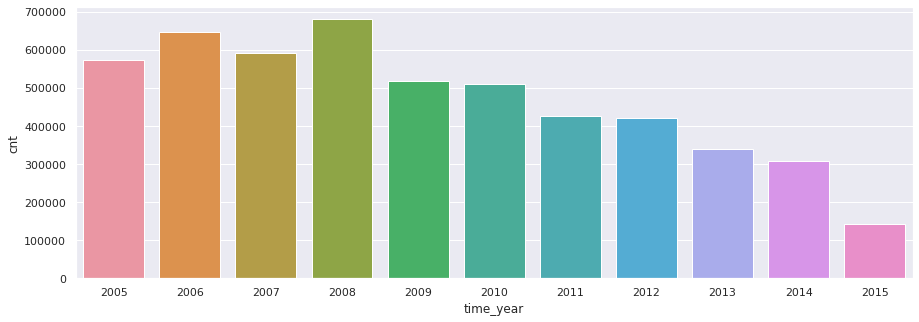

In [ ]:
# 년도별 본 영화 수
x = pd.DataFrame(train_df.groupby(['time_year']).size(), columns=['cnt']).reset_index()
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='time_year', y='cnt', data=x)#.barplot()

- 2009년 이후로 시청한 영화수가 줄어들고 있다.

<AxesSubplot:xlabel='time_month', ylabel='cnt'>

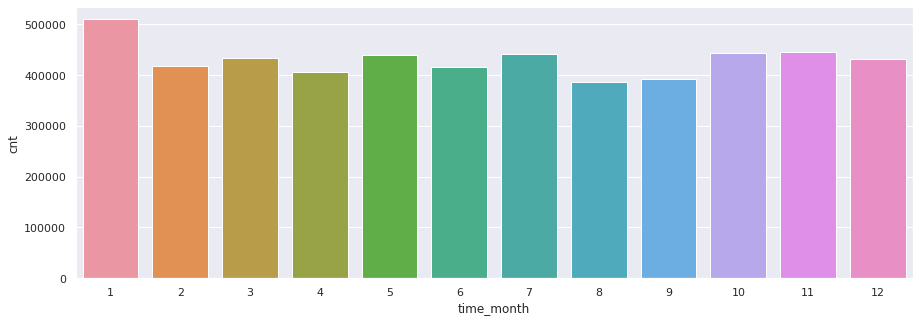

In [ ]:
# 월별 본 영화 수
x = pd.DataFrame(train_df.groupby(['time_month']).size(), columns=['cnt']).reset_index()
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='time_month', y='cnt', data=x)#.barplot()

- 연초인 1월에 휴일도 많아 영화 시청 횟수가 많아 보인다. 생각보다 고른 분포.

<AxesSubplot:xlabel='time_day', ylabel='cnt'>

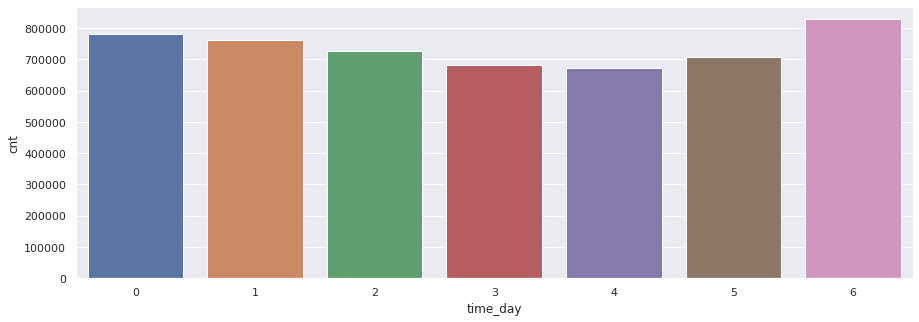

In [ ]:
# 요일별 본 영화 수
x = pd.DataFrame(train_df.groupby(['time_day']).size(), columns=['cnt']).reset_index()
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='time_day', y='cnt', data=x)#.barplot()

- 수요일(3), 목(4) 영화 시청 횟수가 다른 요일보다 적다.
- 월(0), 화(1), 수(2)가 주말인 토요일(5)보다 시청횟수가 많다.
- 일요일(6)이 영화 시청 횟수가 가장 많다.

<AxesSubplot:xlabel='time_hour', ylabel='cnt'>

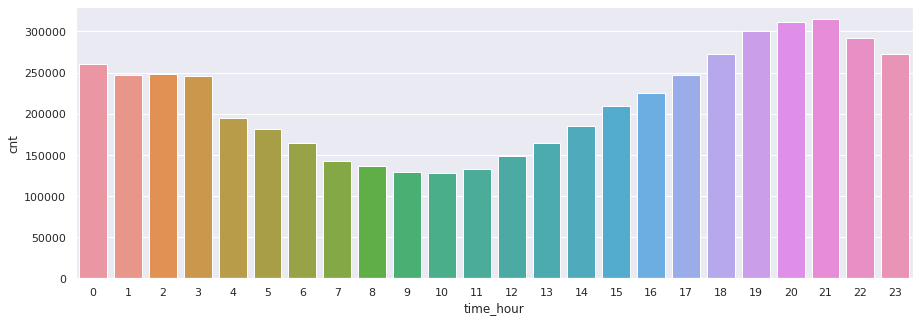

In [ ]:
# 시각별 본 영화 수
x = pd.DataFrame(train_df.groupby(['time_hour']).size(), columns=['cnt']).reset_index()
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='time_hour', y='cnt', data=x)#.barplot()

- 새벽과 오전 시간대인 4~13시 사이에는 영화 시청 횟수가 비교적 적다.
- 저녁시간대인 18~이후가 영화 시청 횟수가 많다.

### 4.2 연도별 어떤 달에 많이 봤는지?

In [ ]:
train_df['cnt'] =1 
x = pd.pivot_table(train_df, index=['time_year'], columns=['time_month'], 
               values='cnt', aggfunc=['sum'], fill_value=0)
x

sum                                                          \
time_month     1      2      3      4      5      6      7      8      9    
time_year                                                                   
2005            0      0      0  52261  85051  78259  67555  55438  58951   
2006        70201  53966  63331  57194  46316  47938  60621  45826  43594   
2007        66137  58468  54134  46700  47297  51400  53535  33226  36172   
2008        64348  51712  47734  42586  38311  44647  56467  53619  44774   
2009        63847  47013  55793  43121  43547  39863  38285  39433  37858   
2010        48883  36786  36814  36276  35115  37997  42416  48299  55620   
2011        46222  36416  41666  42221  38966  36809  33461  33746  29753   
2012        30470  36587  36632  34637  51708  31067  36119  30048  30639   
2013        37696  29427  30139  31186  29687  25538  28016  25105  35838   
2014        26373  22945  22818  20075  23162  21204  24460  21629  17756   
2015        54712  44037  43188      0      0      0      0      0      0   

                                 
time_month     10     11     12  
time_year                        
2005        57174  62195  56010  
2006        52679  45137  60437  
2007        46066  46378  50432  
2008        97398  82306  55367  
2009        36868  35092  36646  
2010        48843  43333  40003  
2011        29778  30106  27959  
2012        31841  34840  37354  
2013        19435  21729  24313  
2014        22228  42893  42738  
2015            0      0      0

In [ ]:
maxValueIndex = x.idxmax(axis = 1)
pd.DataFrame(maxValueIndex)

0
time_year           
2005        (sum, 5)
2006        (sum, 1)
2007        (sum, 1)
2008       (sum, 10)
2009        (sum, 1)
2010        (sum, 9)
2011        (sum, 1)
2012        (sum, 5)
2013        (sum, 1)
2014       (sum, 11)
2015        (sum, 1)

- 대체적으로 1월이 가장 많아보인다.

<AxesSubplot:ylabel='time_year'>

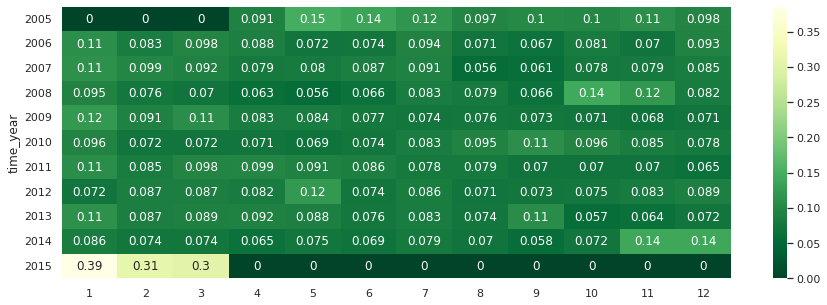

In [ ]:
# heatmap으로 비율을 시각화해서 알아보자.
total = []
for i in range(11):
    total.append(x.values[i] / x.sum(axis=1).values[i])

x = pd.DataFrame(total, index=x.index, columns = [str(i) for i in range(1, 13)])
sns.heatmap(x, annot=True, cmap='YlGn_r')

- 밝을 수록 해당 년도에 영화 시청 횟수 비율이 높다. 위에서 봤듯이 대체적으로 1월이 많아보인다.

### 4.3 시대별 많이 본 장르
- 연도와 월을 시대별이라고 정의

In [ ]:
import time
def time_convert(old_time):
    new_time = time.strftime('%Y-%m', time.localtime(old_time))
    return new_time

In [ ]:
df = train_df.copy()
df['time'] = train_df['time'].apply(lambda x: time_convert(x))

genre_df = pd.merge(df, genre_data, on=['item'])
tmp_genre_df = genre_df.copy()
#tmp_genre_df['cnt'] = 1
tmp_genre_df.drop('user', axis=1, inplace=True)
tmp_genre_df.drop('item', axis=1, inplace=True)
year_genre = tmp_genre_df.groupby(['time', 'genre']).size().unstack()


<AxesSubplot:xlabel='time'>

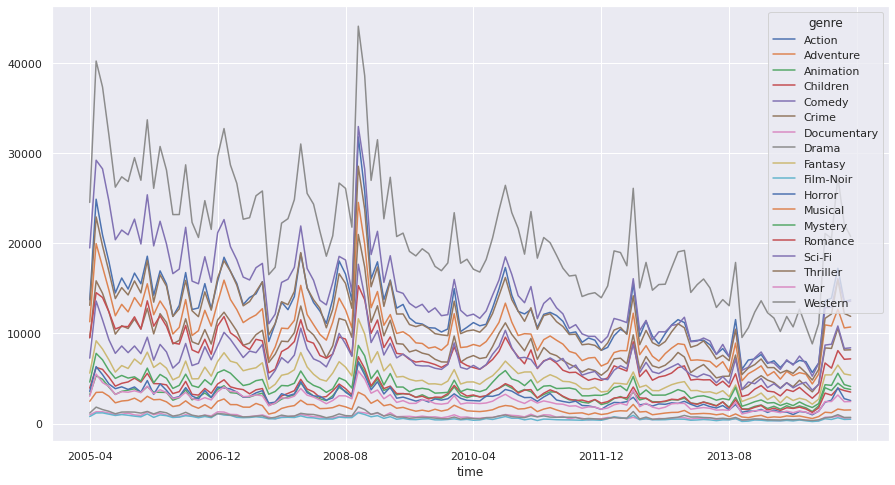

In [ ]:
year_genre.plot(figsize=(15, 8))

- Drama 장르가 위 분석결과처럼 많은 비율을 차지해서 그런지, 모든 년도에 골고루 제일 많이 시청되었다.
- 경향성이 너무 비슷해보인다. (늘어난곳과 줄어든 구간이 거의 똑같다.)

### 4.4 시대별 많이 본 영화

In [ ]:
#condition = (df.time == '2005-04') & (df.item == 1)
#df.loc[condition,:]

In [ ]:
year_item = df.groupby(['time', 'item']).size().unstack()
year_item.head(3)

item     1       2       3       4       5       6       7       8       \
time                                                                      
2005-04   134.0    26.0    15.0     NaN     6.0    59.0    13.0     1.0   
2005-05   210.0    56.0    11.0     1.0    20.0   130.0    22.0     3.0   
2005-06   166.0    45.0    15.0     NaN    14.0    83.0    21.0     2.0   

item     9       10      ...  116823  117176  117533  117881  118696  118700  \
time                     ...                                                   
2005-04     2.0    38.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2005-05     NaN    85.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2005-06     NaN    70.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   

item     118900  118997  119141  119145  
time                                     
2005-04     NaN     NaN     NaN     NaN  
2005-05     NaN     NaN     NaN     NaN  
2005-06     NaN     NaN     NaN     NaN  

[3 rows x 6807 columns]

In [ ]:
import re
def extract_num(x):
    return int(re.findall(r'\d+', str(x))[0])

In [ ]:
# 최대 item의 이름과 값 고르기
maxValueIndex = year_item.idxmax(axis = 1)
a = pd.DataFrame(maxValueIndex)
maxValueIndex = year_item.max(axis = 1)
b = pd.DataFrame(maxValueIndex)

t = pd.concat([a, b], axis=1)
t.columns = ['item', 'cnt']
t['item'] = t['item'].apply(lambda x: extract_num(x)) #쓸데없는 글자 지우기
t = t.reset_index()

In [ ]:
# 시대별 많이 본 영화 목록 개수와 함께 확인하기
all_df = pd.merge(t, title_data, how='left', on='item')
all_df['title'].value_counts().head(10)
# 총 56개 영화

Inception (2010)           16
Matrix, The (1999)          9
Dark Knight, The (2008)     8
Gravity (2013)              5
Avatar (2009)               5
Batman Begins (2005)        4
Django Unchained (2012)     4
Interstellar (2014)         3
Avengers, The (2012)        3
V for Vendetta (2006)       3
Name: title, dtype: int64

In [ ]:
top_7 = ['Inception (2010)', 'Matrix, The (1999)', 'Dark Knight, The (2008)',
         'Gravity (2013)', 'Avatar (2009)', 'Batman Begins (2005)', 'Django Unchained (2012)']
top_7_number = [79132, 2571, 58559, 104841, 72998, 33794, 99114]

top_7_df = year_item[top_7_number]
top_7_df.columns = top_7

<AxesSubplot:xlabel='time'>

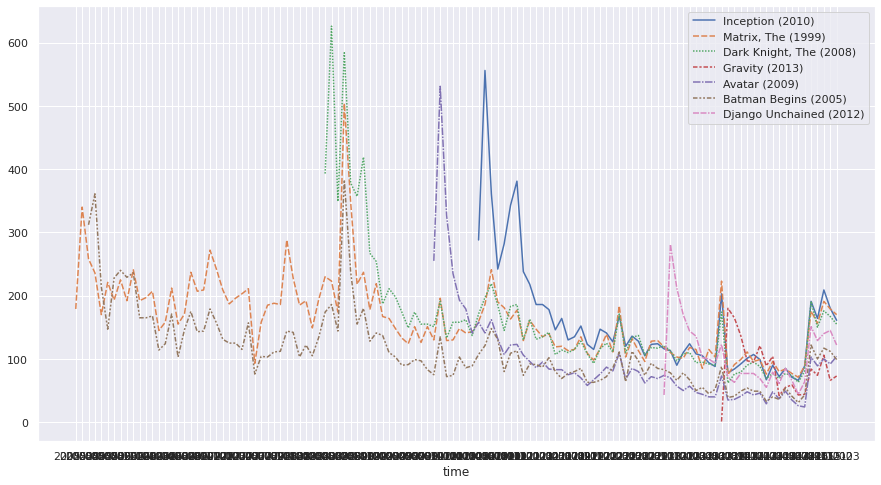

In [ ]:
# 시대별 많이 본 영화 top7에서 나온 영화들을 시대 흐름별로 시청 횟수 보기
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(data=top_7_df)

- 인셉션,매트릭스 순으로 영화가 시대별로 많이 시청되었다.
- 보통 개봉 후 급 상승하고 시간이 지나면서 다른 영화들과 비슷한 시청횟수를 보인다.

### 4.5 시간대별 많이 본 장르
- 오전이나 오후 타임에는 밝은 영화를 보고, 저녁이나 늦은 시간대에 무서운 영화를 볼 것이라 추측.

In [ ]:
genre_df = pd.merge(df, genre_data, on=['item'])
tmp_genre_df = genre_df.copy()
#tmp_genre_df['cnt'] = 1
tmp_genre_df.drop('user', axis=1, inplace=True)
tmp_genre_df.drop('item', axis=1, inplace=True)
hour_genre = tmp_genre_df.groupby(['time_hour', 'genre']).size().unstack()


<AxesSubplot:xlabel='time_hour'>

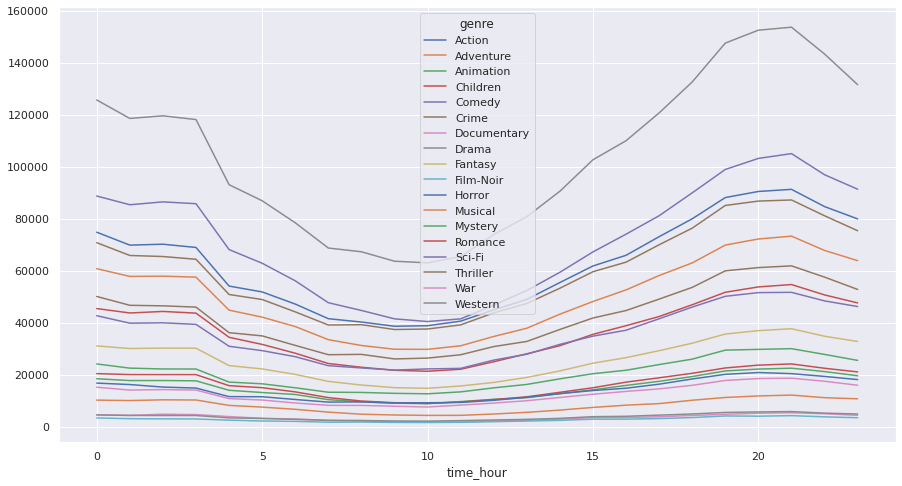

In [ ]:
hour_genre.plot(figsize=(15, 8))

- 역시 Drrama가 제일 많다.
- 오전~오후시간대로 갈수록 Comedy, Action, Thriller의 영화 시청 차이 수가 줄어든다. 
- Animation, Horror, War, Musical도 오전~오후 시간대로 갈수록 영화 시청 차이 수가 줄어든다.
- 나머지는 거의 비슷한 경향.
> 예상과 달리 시간대에 따른 영화 장르 시청 선호는 큰 차이가 없다.

In [ ]:
# 위 라벨이 많아서 장르 식별이 어려워서 비교용.
#x = pd.concat([pd.DataFrame(hour_genre.columns.values),
#           pd.DataFrame(hour_genre.values[0])], axis=1)
#x.columns = ['genre', 'cnt']
#x.sort_values('cnt', ascending=False)

### 4.6 시간대별 많이 본 영화

In [ ]:
hour_item = df.groupby(['time_hour', 'item']).size().unstack()
hour_item.head()

item       1       2       3       4       5       6       7       8       \
time_hour                                                                   
0           635.0   176.0    38.0     5.0    25.0   259.0    49.0     2.0   
1           631.0   175.0    37.0     2.0    29.0   225.0    41.0     4.0   
2           612.0   169.0    51.0     6.0    42.0   198.0    53.0     4.0   
3           624.0   163.0    39.0     4.0    43.0   193.0    41.0     3.0   
4           472.0   119.0    37.0     2.0    24.0   172.0    33.0     2.0   

item       9       10      ...  116823  117176  117533  117881  118696  \
time_hour                  ...                                           
0             3.0   209.0  ...    15.0     8.0     1.0     NaN    19.0   
1             4.0   184.0  ...    15.0     8.0     2.0     4.0     9.0   
2             2.0   204.0  ...    16.0     8.0     3.0     2.0     9.0   
3             2.0   189.0  ...    20.0     9.0     1.0     1.0     4.0   
4             1.0   136.0  ...    11.0     8.0     4.0     3.0     3.0   

item       118700  118900  118997  119141  119145  
time_hour                                          
0             2.0     2.0     3.0     9.0     2.0  
1             5.0     3.0     3.0    11.0     3.0  
2             8.0     7.0     4.0     9.0     5.0  
3             4.0     6.0     5.0     8.0     3.0  
4             4.0     6.0     3.0     5.0     3.0  

[5 rows x 6807 columns]

In [ ]:
# 최대 item의 이름과 값 고르기
maxValueIndex = hour_item.idxmax(axis = 1)
a = pd.DataFrame(maxValueIndex)
maxValueIndex = hour_item.max(axis = 1)
b = pd.DataFrame(maxValueIndex)

t = pd.concat([a, b], axis=1)
t.columns = ['item', 'cnt']
t['item'] = t['item'].apply(lambda x: extract_num(x)) #쓸데없는 글자 지우기
t = t.reset_index()

In [ ]:
# 시간대별 많이 본 영화 목록 개수와 함께 확인하기
all_df = pd.merge(t, title_data, how='left', on='item')
all_df['title'].value_counts().head(10)
# 총 3개 영화

Matrix, The (1999)                  22
Shawshank Redemption, The (1994)     1
Pulp Fiction (1994)                  1
Name: title, dtype: int64

In [ ]:
#all_df.item.value_counts()

In [ ]:
top_3 = ['Matrix, The (1999)', 'Shawshank Redemption, The (1994)', 'Pulp Fiction (1994)']
top_3_number = [2571, 318, 296]

top_3_df = hour_item[top_3_number]
top_3_df.columns = top_3

<AxesSubplot:xlabel='time_hour'>

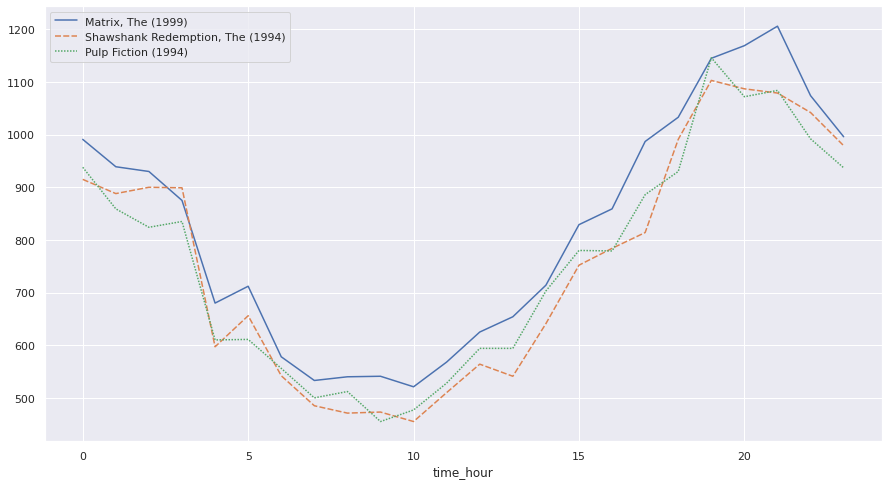

In [ ]:
# 시대별 많이 본 영화 top7에서 나온 영화들을 시대 흐름별로 시청 횟수 보기
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(data=top_3_df)

- 4.4 시대별에 많이 본 영화인 Inception은 왜 해당되지 않을가 생각해보니, matrix는 inception보다 훨씬 이전에 개봉되어서 시간대별 시청횟수가 기록되어 matrix가 가장 많음 알 수 있었다.
- 이를 통해 대체로 2000년대 이전에 개봉한 영화들이 시간대별 가장 많은 영화 시청을 보인다.
> 거의 모든 시간대에 matrix가 많이 시청되었다.